# Enoch Ikunda
### COS 184 fall 2020

## Program 7: Births data visualized (20 points)

This assignment gets us into some visualization of actual data. Lab 8 and Program 6 have already paved the way by saving a nice clean reduced <code>DataFrame</code>. Program 6 saved the reduced data as a pickled <code>DataFrame</code> so we can just read it in ("un-pickle it") and get going.

In [57]:
# Don't change this cell.
import pandas as pd, numpy as np
import pylab as pl
DataIn = 'Births2006reduced.pkl'

In [58]:
# Your code goes here, to read the pickled DataFrame and un-pickle it on the way. Name the result births.
births = pd.read_pickle(DataIn)
births

,MAGER,APGAR5,ESTGEST,DBWT
0,28.0,9.0,37.0,3625.0
1,18.0,9.0,38.0,3650.0
2,21.0,9.0,38.0,3045.0
3,25.0,10.0,40.0,3827.0
4,28.0,8.0,39.0,3090.0
...,...,...,...,...
367978,20.0,8.0,39.0,2187.0
367979,30.0,9.0,38.0,3210.0
367980,34.0,9.0,39.0,3799.0
367981,32.0,9.0,38.0,4290.0


Now's the time to start asking questions that we can use the data to answer. The best way to do a study like this is to start with the questions first and then choose the data in response to them, but we have done this the other way around. Let's list some questions that might have interesting answers. Please feel free to add to, or substitute for entries in this list, as long as the questions can be answered from the data in the columns we have of <code>births</code>.
<ol>
<li>What proportion of births have different periods of gestation?
<li>Is there an optimum birth weight for a healthy baby?
</ol>

The question regarding gestation is really a question about the <i>distribution</i> of gestations. Let's begin by forming an histogram of estimated gestations -- use the DataFrame method <code>hist()</code>. You can find a description of this method at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html.

array([[<AxesSubplot:title={'center':'ESTGEST'}>]], dtype=object)

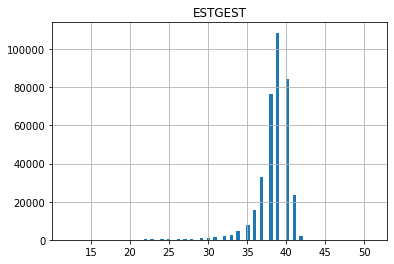

In [59]:
%matplotlib inline
# Your code goes here to histogram the ESTGEST column. Try 92 bins.
births.hist( column='ESTGEST', bins=92)
#births['ESTGEST'].max()
#births['ESTGEST'].min()

A piechart would answer the question better for those who think visually, but piecharts require that we <i>categorize</i> the data. Inspect the histogram and select 4-6 ranges of gestation periods. Then count how many gestations fall in each range. Select the ranges so that they completely cover all possible gestations, and if any one range has too many births, make it a bit smaller (and the adjoining range a bit bigger).

In [60]:
counts = []  # counts in each range (needed for the pie chart).
# Your code goes here to compute a list of counts. First create a Boolean index that is True
boolcol = True 
# if the value in the ESTGEST column is between a and b, inclusive:
#    boolcol = (births.ESTGEST >= a) & (births.ESTGEST <= b)
boolcol = (births.ESTGEST >= 12) & (births.ESTGEST <= 25)
# Now use that index to create a reduced DataFrame, and count its rows:
#    k = births.ESTGEST[boolcol].count()
k = births.ESTGEST[boolcol].count()
counts.append(k)
# Now do this for each range and put the result in counts.

boolcol = (births.ESTGEST >= 26) & (births.ESTGEST <= 32)
k = births.ESTGEST[boolcol].count()
counts.append(k)

boolcol = (births.ESTGEST >= 33) & (births.ESTGEST <= 39)
k = births.ESTGEST[boolcol].count()
counts.append(k)

boolcol = (births.ESTGEST >= 40) & (births.ESTGEST <=51)
k = births.ESTGEST[boolcol].count()
counts.append(k)
counts

[1641, 6520, 249466, 110356]

Now we can use <code>counts</code> to form a pie chart.

([<matplotlib.patches.Wedge at 0x19f38002070>,
 [Text(1.4998527973594942, 0.021013953766493627, '12-25'),
  Text(1.0961506903263176, 0.09194380945521866, '26-32'),
  Text(-0.7072281499334321, 0.8425131120295607, '33-39'),
  Text(0.6468591776155195, -0.8897039981558889, '40-51')])

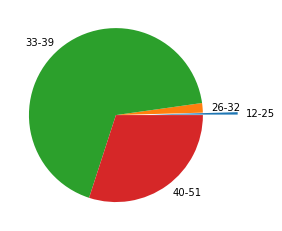

In [61]:
# Your code goes here to make a pie chart of the list of counts.
labels = ['12-25','26-32','33-39','40-51']
explode = [0.4,0,0,0]
pl.pie(x=counts,explode=explode,labels=labels)

The second question, "Is there an optimum birth weight for a healthy baby?" can be cast as a plot of the  <code>APGAR5</code> score vs. birth weight <code>DBWT</code>. This time, even though there are many data points, we blithely create a scatter plot.

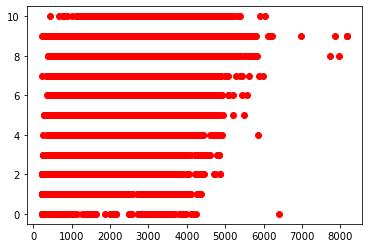

In [62]:
weight = births.DBWT
health = births.APGAR5
# Your code goes here to show a scatter plot of weight vs health.
pl.plot(weight,health,'ro')
#pl.title(title)
pl.show()

What this plot suggests is that the healthiest babies have a fairly wide range of weights, including some pretty low ones (but not the lowest) and some pretty high ones (but not the highest). Babies with middle scores (<code>APGAR5</code> = 5) have a bit narrower range, tending towards the lighter side. Babies with really poor scores generally tend towards lighter weight. We can confirm this visual impression by computing categories based on the <code>APGAR5</code> score and showing their averages.

Make a list containing the mean value of all birth weights for babies with an <code>APGAR5</code> score equal to the index: that is, the first value in the list (index = 0) is the mean value of all birth weights with an <code>APGAR5</code> value of 0. We will do this in a way that is very similar to what we did to answer the first question.

In [63]:
means = []  # means[i] is the mean birth weight for an APGAR5 score of i
# First create a Boolean index that is True if the APGAR5 score is i:
boolcol = True
#   boolcol = births.APGAR5 == i
for i in range (0,11):
    boolcol = births.APGAR5 == i
    # Now use that index to create a reduced DataFrame, and calculate its mean:
    #   k = births.DBWT[boolcol].mean()
    k = births.DBWT[boolcol].mean()
    means.insert(i,k)
# Now do this for each possible APGAR5 score (0-10) and put the result in means.

Let's do a bar chart of these means.

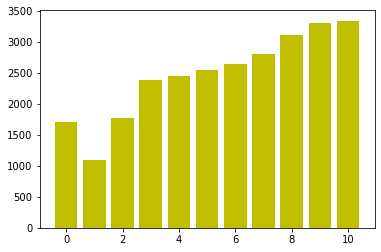

In [64]:
# Your code goes here to make a vertical bar chart of means. The first argument to pl.bar() must be
# a list of the APGAR5 scores (0-10) and the second argument must be the list means.
list_APGAR5 = [0,1,2,3,4,5,6,7,8,9,10]
pl.bar(list_APGAR5,means,color='y')
pl.show()

This generally confirms our earlier observation: that the average birth weight of healthy babies is higher than that of sick babies. The sickest babies (<code>APGAR5</code> = 1) have the lowest average birth weight. The <code>APGAR5</code> score of 0 means that the baby is dead, and may have died for a host of reasons.